# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Moh. Hasby Ali]
- **Email:** [hasbyali45@gmail.com]
- **ID Dicoding:** [hasby_ali]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah penyewa sepeda terhadap keempat musim?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Data Wrangling

### Gathering Data

In [ ]:
#Mengimport Dataset dan Memunculkan 5 Data Teratas
df=pd.read_csv('/content/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dari tabel diatas, didapat beberapa info dari tiap kolom dengan keterangan sebagai berikut:
- instant : Nomor
- dteday : Tanggal
- season : Musim (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)
- yr : Tahun (0 = 2011, 1 = 2012)
- mnth : Bulan (1 - 12)
- hr : Jam (0 - 23)
- holiday : Hari libur
- weekday : Hari kerja
- workingday : 0 = hari libur, 1 = hari kerja
- weathersit : Kondisi cuaca (1 = Cerah, 2 = Kabut, 3 = Hujan ringan, 4 = Hujan berat)
- temp = Suhu aktual
- atemp = Suhu yang dirasakan
- hum = Kelembapan
- windspeed = Kecepatan angin
- casual = Jumlah pengguna casual
- registered = Jumlah pengguna yang terdaftar
- cnt = Jumlah penyewa sepeda termasuk casual dan registered.

### Assessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset terdiri dari 17379 baris dan 17 kolom.
- Data non-null pada tiap kolom artinya tidak ada data yang kosong.
- Tipe data 'dteday' adalah string, tipe data ini harus diubah ke date time









In [ ]:
df.duplicated().sum()

0

**Insight:**
Tidak ada data yang terduplikasi pada dataset.

In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**:
- Rata - rata musim adalah 2.50 yang berarti data paling banyak ditunjukkan pada musim kedua sampai ketiga (*Summer* - *Spring*).
- *Weathersit* = 1.42 berarti jumlah penyewa sepeda paling banyak melakukan aktivitas saat kondisi cuaca cerah.
- Dilihat dari rata-ratanya, jumlah penyewa sepeda yang *registered* lebih banyak daripada *casual*.



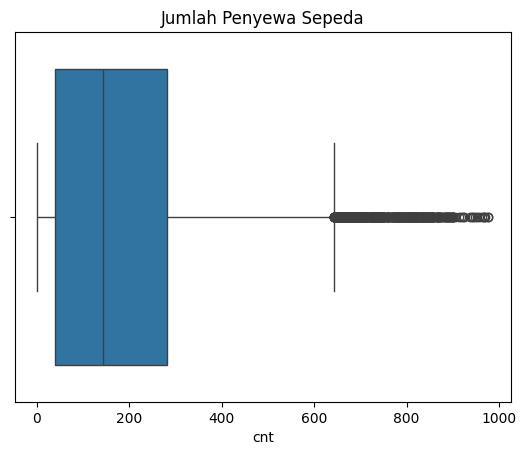

In [ ]:
#Cek outlier penyewa sepeda menggunakan Boxplot
plt.figure
sns.boxplot(x=df['cnt'])
plt.title('Jumlah Penyewa Sepeda')
plt.show()

**Insight**: Terdapat outlier pada jumlah penyewa sepeda

### Cleaning Data

In [ ]:
#Mengubah tipe data pada 'dteday'
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
#Menghapus Outlier
Q1 = (df['cnt']).quantile(0.25)
Q3 = (df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['cnt'] < minimum
kondisi_more_than = df['cnt'] > maximum

df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

**Insight:**
- Outlier telah dihilangkan, data berubah dari 17379 baris menjadi 16874 baris.
- Kolom data 'dteday' telah diubah ke bentuk tipe data datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2011-12-26 23:54:06.699063808,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,2011-06-29 00:00:00,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,2011-12-23 00:00:00,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,2012-06-23 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000
std,5007.766040,NaN,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918


**Insight:**
- Data terdiri dari 16874 baris dan 17 kolom.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
df.groupby(by='season').agg({
    'cnt': 'mean',
})

,cnt
season,
1,108.410609
2,189.459440
3,211.527687
4,180.872195


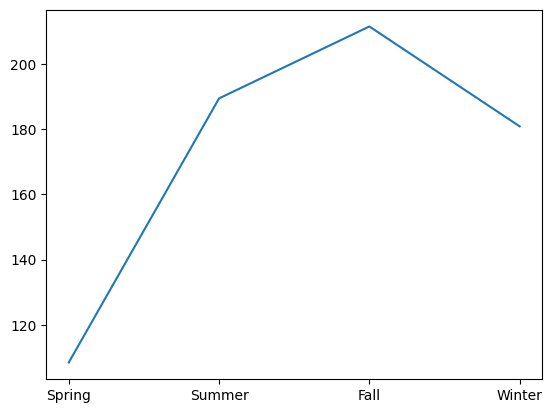

In [ ]:
musim = ('Spring', 'Summer', 'Fall', 'Winter')

mean1 = (108.410609, 189.459440, 211.527687, 180.872195)

plt.plot(musim, mean1)
plt.show()

**Insight:** Perbedaan jumlah penyewa sepeda terhadap keempat musim adalah sebagai berikut:
1. Spring dengan rata - rata = 108.410609 ≈ 108
2. Summer dengan rata - rata = 189.459440 ≈ 189
3. Fall dengan rata - rata = 211.527687 ≈ 212
4. Winter dengan rata - rata = 180.872195 ≈ 181


### Pertanyaan 2:

In [ ]:
df.groupby(by='weathersit').agg({
    'cnt': 'mean',
})

,cnt
weathersit,
1,185.314247
2,162.626463
3,106.050462
4,74.333333


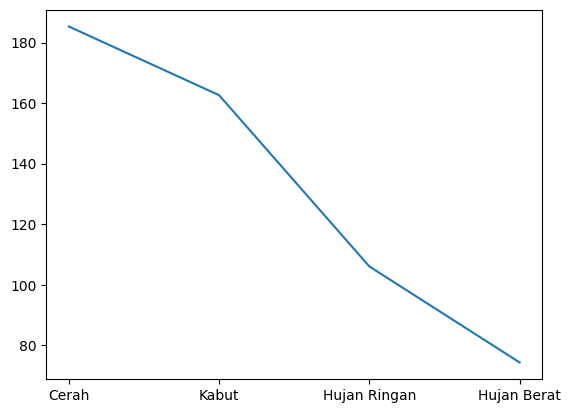

In [ ]:
kondisi_cuaca = ('Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat')

mean2 = (185.314247, 162.626463, 106.050462, 74.333333)

plt.plot(kondisi_cuaca, mean2)
plt.show()

**Insight:**
Perbedaan jumlah penyewa sepeda terhadap kondisi cuaca adalah sebagai berikut:
1. Cerah dengan rata - rata = 185.314247 ≈ 185
2. Kabut dengan rata - rata = 162.626463 ≈ 163
3. Hujan ringan dengan rata - rata = 106.050462 ≈ 106
4. Hujan berat dengan rata - rata = 74.333333 ≈ 74

## Analisis Lanjutan (Opsional)

## Conclusion

- Rata - rata penyewa sepeda tertinggi yaitu pada musim fall (musim gugur) dengan rata - rata ≈ 211 penyewa, dan tertinggi kedua adalah musim summer (musim panas) dengan rata - rata ≈ 189 penyewa. Berdasarkan hasil tersebut dapat disimpulkan bahwa rata - rata penyewa sepeda paling banyak pada pertengahan tahun.
- Rata-rata penyewa sepeda tertinggi yaitu pada kondisi cuaca cerah dengan rata - rata ≈ 185 penyewa, dan tertinggi kedua kondisi berkabut dengan rata - rata ≈ 163 penyewa. Berdasarkan hasil tersebut dapat disimpulkan bahwa penyewa sepeda saat kondisi cuaca cerah lebih banyak daripada penyewa sepeda saat kondisi cuaca hujan.